<a href="https://colab.research.google.com/github/mahananda123/PhishingDetection/blob/main/SamplePhishingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Machine Learning/5.urldata.csv')
data

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1


# Data Details

In [3]:
data.shape

(10000, 18)

In [4]:
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# Visualization of data

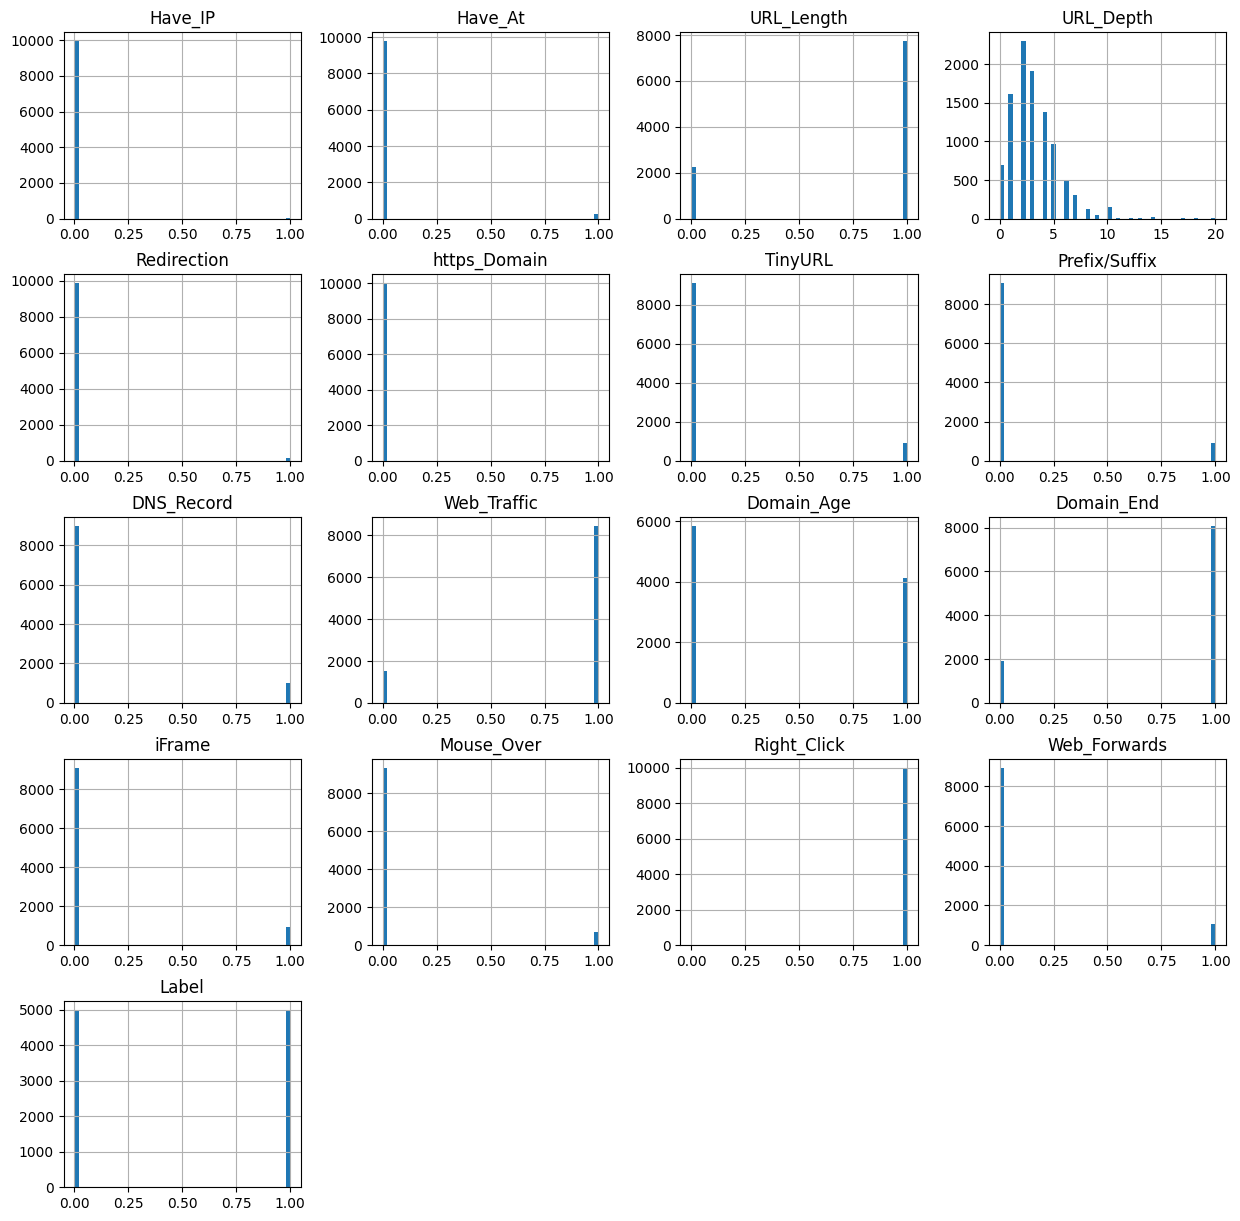

In [6]:
data.hist(bins = 50,figsize = (15,15))
plt.show()

<ipython-input-7-45420d3d818d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


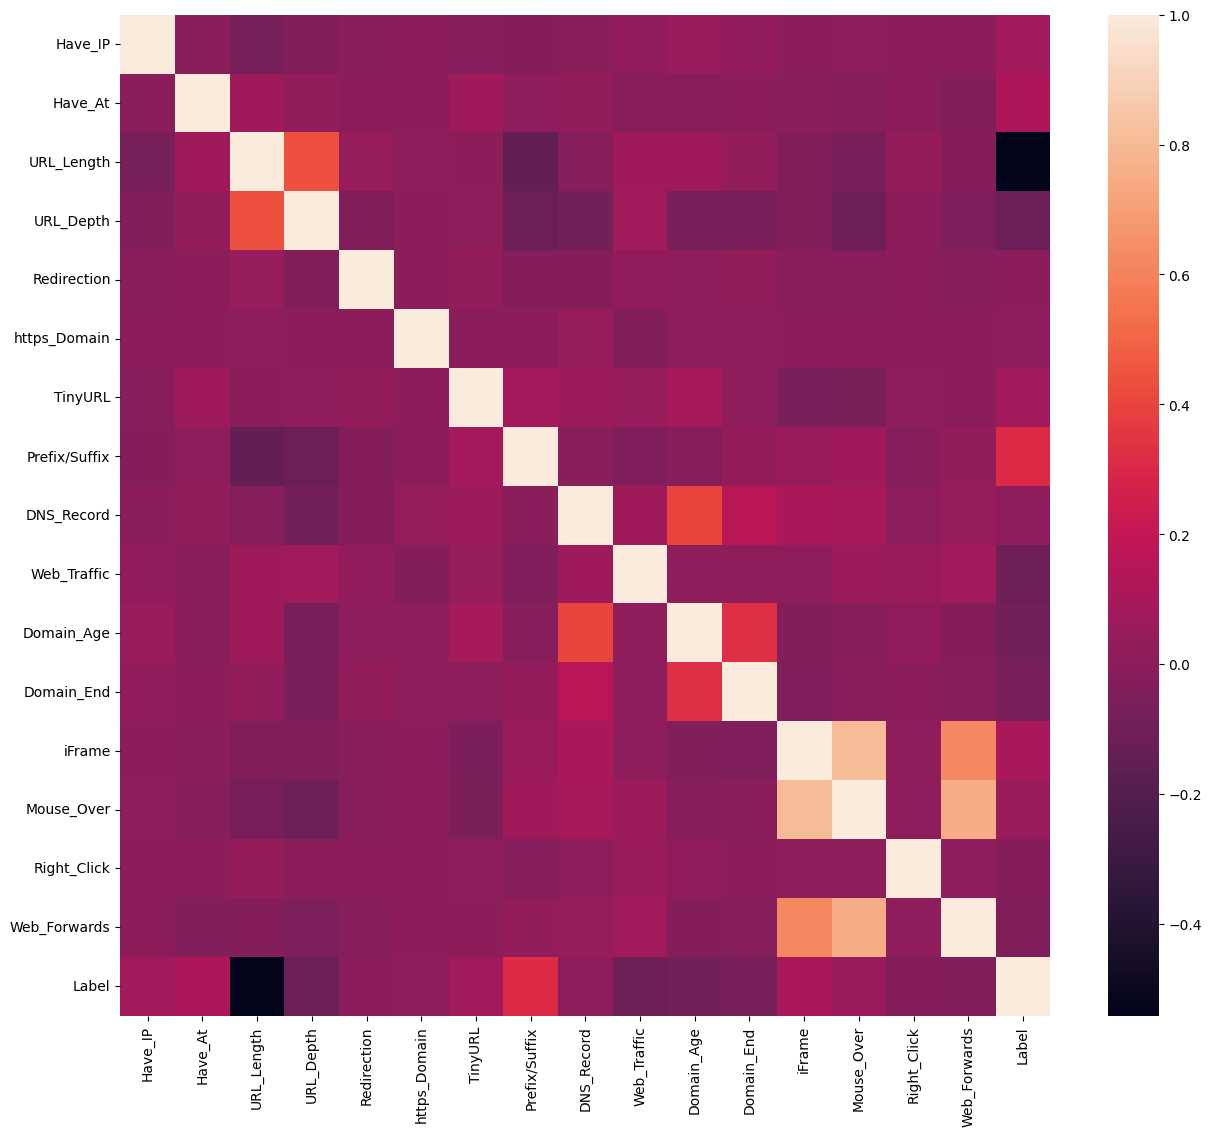

In [7]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

# Data Pre-processing


In [8]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [9]:

#Dropping the Domain column
df = data.drop(['Domain'], axis = 1).copy()

In [10]:
df.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [11]:
#checking the data for null or missing values
df.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [12]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0,0,1,5,0,0,0,0,0,1,0,0,0,0,1,0,1
2,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0
3,0,0,1,2,0,0,0,0,0,1,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1


# Data Splitting

In [13]:

# Sepratating & assigning features and target columns to X & y
y = df['Label']
X = df.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# Machine Learning Algorithms

1. Decision Tree
2. Random Forest
3. Multilayer Perceptrons
4. XGBoost
5. Autoencoder Neural Network
6. Support Vector Machines

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
ML_model=[]
trainAccuracy=[]
testAccuracy=[]
#function to call for storing the results
def storeResults(model, a,b):
  ML_model.append(model)
  trainAccuracy.append(round(a, 3))
  testAccuracy.append(round(b, 3))

# Decision Tree Classifier

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [17]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 40)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40)

In [18]:

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

# Performance Evaluation

In [19]:

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.869
Decision Tree: Accuracy on test Data: 0.853


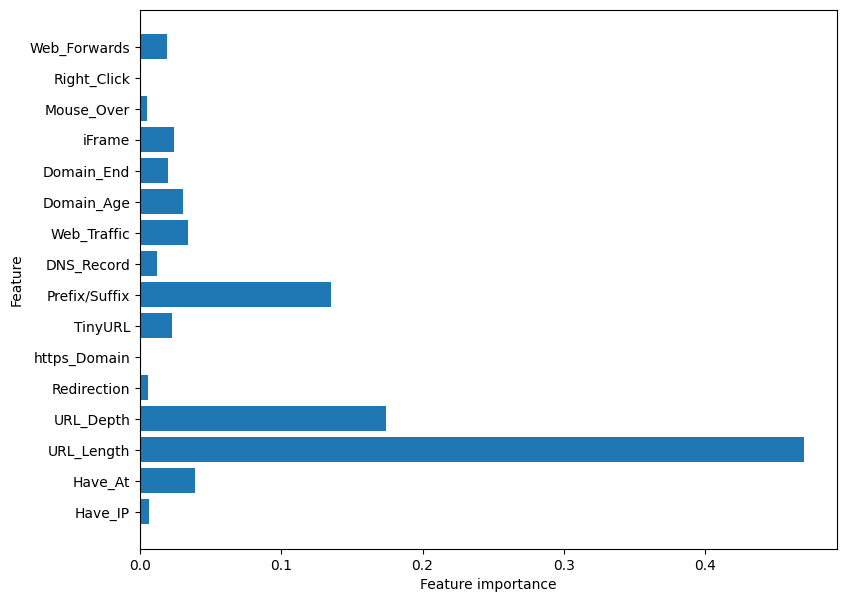

In [20]:

#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


In [21]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)


# Random Forest Classifier

Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [22]:

# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=40)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=40)

In [23]:

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

## Performance Evaluation


In [24]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [25]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.869
Random forest: Accuracy on test Data: 0.851


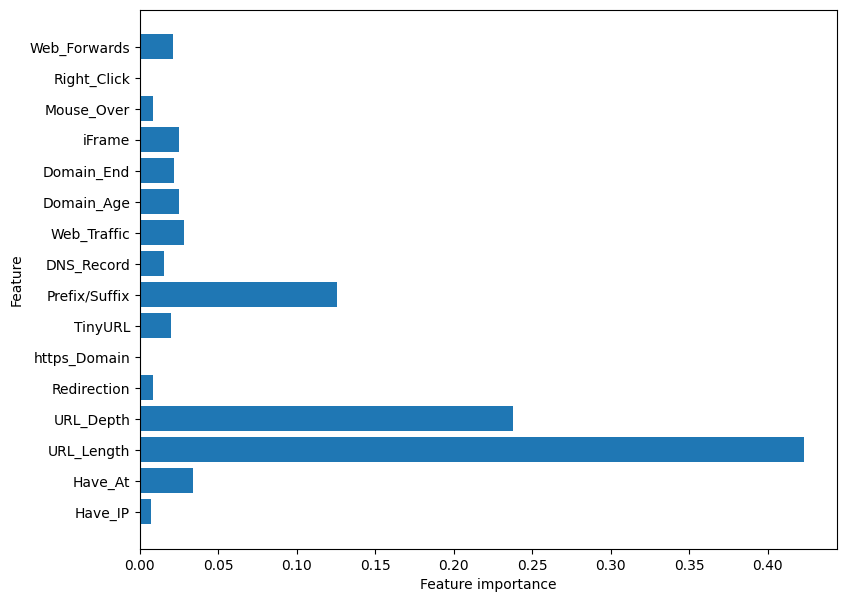

In [26]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [27]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# Multilayer perceptrons(MLP): Deep Learning
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [28]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(alpha=0.4,hidden_layer_sizes=([100,100,100]))
mlp.fit(X_train,y_train)

MLPClassifier(alpha=0.4, hidden_layer_sizes=[100, 100, 100])

In [29]:
mlpTest=mlp.predict(X_test)
mlpTrain=mlp.predict(X_train)

In [30]:
mlpTrainAccuracy=accuracy_score(y_train,mlpTrain)
mlpTestAccuracy=accuracy_score(y_test,mlpTest)
print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(mlpTrainAccuracy))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(mlpTestAccuracy))

Multilayer Perceptrons: Accuracy on training Data: 0.856
Multilayer Perceptrons: Accuracy on test Data: 0.854


In [31]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', mlpTrainAccuracy, mlpTestAccuracy)

# XGboost Classifier
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [32]:
from xgboost import XGBClassifier

In [33]:
xgb=XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
xgbTest=xgb.predict(X_test)
xgbTrain=xgb.predict(X_train)

In [35]:
xgbTrainAccuracy=accuracy_score(y_train,xgbTrain)
xgbTestAccuracy=accuracy_score(y_test,xgbTest)
print("XGBoost: Accuracy on Training Data:{:.3f}".format(xgbTrainAccuracy))
print("XGBoost: Accuracy on testing Data:{:.3f}".format(xgbTestAccuracy))

XGBoost: Accuracy on Training Data:0.868
XGBoost: Accuracy on testing Data:0.857


In [50]:
storeResults('xgb',xgbTrainAccuracy,xgbTestAccuracy)

# Autoencoder Neural Network
An auto encoder is a neural network that has the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are exactly the same in an auto encoder.

In [51]:
import keras
from tensorflow.keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [52]:
input_dimen=X_train.shape[1]
encoding_dim=input_dimen
input_layer=Input(shape=(input_dimen))
encoder = Dense(encoding_dim, activation="relu",activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)
encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)
decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dimen, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [53]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 14)                238       
                                                                 
 dense_12 (Dense)            (None, 16)                240       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
Total params: 1294 (5.05 KB)
Trainable params: 1294 (5.05 K

In [54]:
#compiling the model
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [55]:
#Training the model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 2s 6ms/step - loss: 2.4699 - accuracy: 0.6380 - val_loss: 1.0243 - val_accuracy: 0.8706
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: -0.2980 - accuracy: 0.8459 - val_loss: -0.8303 - val_accuracy: 0.8669
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: -0.8785 - accuracy: 0.8220 - val_loss: -1.0669 - val_accuracy: 0.8100
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: -0.9425 - accuracy: 0.7783 - val_loss: -1.0785 - val_accuracy: 0.7800
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: -0.9534 - accuracy: 0.7080 - val_loss: -1.0882 - val_accuracy: 0.7244
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: -0.9630 - accuracy: 0.6837 - val_loss: -1.0970 - val_accuracy: 0.7019
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: -0.9717 - accuracy: 0.6841 - val_loss: -1.1005 - val_accuracy: 0

In [56]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]
print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 3ms/step - loss: -1.1578 - accuracy: 0.3475

Autoencoder: Accuracy on training Data: 0.356
Autoencoder: Accuracy on test Data: 0.347


In [48]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

# Comparision of Models

In [57]:
results=pd.DataFrame({'ML model':ML_model,
                      'Train Accuracy':trainAccuracy,
                      'Test Accuracy': testAccuracy})
results

,ML model,Train Accuracy,Test Accuracy
0,Decision Tree,0.869,0.852
1,Random Forest,0.869,0.851
2,Multilayer Perceptrons,0.856,0.854
3,"XGBClassifier(base_score=None, booster=None, c...",0.868,0.856
4,AutoEncoder,0.002,0.001
5,AutoEncoder,0.002,0.001
6,xgb,0.868,0.856


In [58]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML model,Train Accuracy,Test Accuracy
3,"XGBClassifier(base_score=None, booster=None, c...",0.868,0.856
6,xgb,0.868,0.856
2,Multilayer Perceptrons,0.856,0.854
0,Decision Tree,0.869,0.852
1,Random Forest,0.869,0.851
4,AutoEncoder,0.002,0.001
5,AutoEncoder,0.002,0.001


In [62]:
import pickle
pickle.dump(xgb,open('XGBoostClassifier.pickle.dat','wb'))

In [63]:
loaded_model=pickle.load(open('XGBoostClassifier.pickle.dat','rb'))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

https://blog.keras.io/building-autoencoders-in-keras.html
https://en.wikipedia.org/wiki/Autoencoder
https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/